<a href="https://colab.research.google.com/github/haniyturana/Data-Science-Project/blob/main/P166239_DataScience_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction:

The study uses UCI Adult Census Income from the UCI Machine Learning Repository to study:

1.   Income-related pattern

*    Investigate demographic and socioeconomic factors associated with different income groups.

2.   Build a predictive model for customer income classification

*    Analyze which features are more significant to predict the income level
*    Evaluate feature importance using Machine Learning models

3.   Understand customer traits


*    Profile customer's groups likely under high or low income.
*    Relate demographic traits to potential banking behaviour such as credit utilisation or savings potentials.

The dataset contains socioeconomic information such as age, education, occupation, working hours and marital status.

From banking or financial sector, understanding customer income patterns is important.

Customer's income would have high impact towards:

1.   Creditworthiness
2.   Loan risk
3.   Saving behavior
4.   Product preference

Link to raw dataset:
[link text](https://archive.ics.uci.edu/dataset/2/adult)

This is a training dataset for developing and evaluating a classification model.

The predictive models is to classify whether a customer's annual income exceed $50k based on the demographic attributes.

For a robust model evaluation, test dataset will be imported and used to validate the model's performance and accuracy.

Problem Statement:

In the banking or financial sector, customer income is an important element for credit evaluation, risk assessment and product offering. However, customer not always provide complete or accurate information on their income. Therefore, banks may need to estimate the income levels using the demographic data.


The study aims to answer the key questions:

Can a customer's income level (greater than or less than $50K monthly be accurately predicted using demographic features such as age, gender, occupation, marital status, and working hours?

Therefore, using the "Adult Cencus Income" dataset, the project will examine:

1.   Differences between high-income and low-income groups
2.   Which demographic factors influence income
3.   How accurately the machine learning models can classify income levels

The findings can support banks in estimating income when direct financial informations is unavailable. Besides, the findings may also helps improves credit risk assessment and customer segementations.



**Step 1**


---
Import data



In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2) #id=2 is adult dataset

# data (as pandas dataframes)
X = adult.data.features #predictor columns
y = adult.data.targets  #income columns

ucimlrepo_df = pd.concat([X, y], axis = 1)


**Step 2**


---
Data Exploration



In [ ]:
# 1. Quick look on data

print(ucimlrepo_df.head())



   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
# 2.rename the fnlwgt to cencus_weight for better understanding
ucimlrepo_df = ucimlrepo_df.rename(columns={'fnlwgt':'census_weight'})
ucimlrepo_df.columns.tolist()
print(ucimlrepo_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   census_weight   48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [ ]:
#3. check object data type

from types import new_class
cat_cols = ucimlrepo_df.select_dtypes(include='object').columns

summary = []
for col in cat_cols:
  n_categories = ucimlrepo_df[col].nunique()
  categories = ucimlrepo_df[col].unique()
  summary.append([col, n_categories, categories])

#convert to dataframe for display
cat_summary = pd.DataFrame(summary, columns = ['Column', 'N_Categories', 'Categories'])
pd.set_option('display.max_rows', None)
print(cat_summary)


           Column  N_Categories  \
0       workclass             9   
1       education            16   
2  marital-status             7   
3      occupation            15   
4    relationship             6   
5            race             5   
6             sex             2   
7  native-country            42   
8          income             4   

                                          Categories  
0  [State-gov, Self-emp-not-inc, Private, Federal...  
1  [Bachelors, HS-grad, 11th, Masters, 9th, Some-...  
2  [Never-married, Married-civ-spouse, Divorced, ...  
3  [Adm-clerical, Exec-managerial, Handlers-clean...  
4  [Not-in-family, Husband, Wife, Own-child, Unma...  
5  [White, Black, Asian-Pac-Islander, Amer-Indian...  
6                                     [Male, Female]  
7  [United-States, Cuba, Jamaica, India, ?, Mexic...  
8                       [<=50K, >50K, <=50K., >50K.]  


In [ ]:
#4.since object dtype is categorical so convert them to categorical

cat_cols = ucimlrepo_df.select_dtypes(include='object').columns
ucimlrepo_df[cat_cols] = ucimlrepo_df[cat_cols].astype('category')

print(ucimlrepo_df.dtypes)

age                  int64
workclass         category
census_weight        int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income            category
dtype: object


In [ ]:
#5. show summary stat for numeric data
print(ucimlrepo_df.describe())

           age  census_weight  education-num  capital-gain  capital-loss  \
count 48842.00       48842.00       48842.00      48842.00      48842.00   
mean     38.64      189664.13          10.08       1079.07         87.50   
std      13.71      105604.03           2.57       7452.02        403.00   
min      17.00       12285.00           1.00          0.00          0.00   
25%      28.00      117550.50           9.00          0.00          0.00   
50%      37.00      178144.50          10.00          0.00          0.00   
75%      48.00      237642.00          12.00          0.00          0.00   
max      90.00     1490400.00          16.00      99999.00       4356.00   

       hours-per-week  
count        48842.00  
mean            40.42  
std             12.39  
min              1.00  
25%             40.00  
50%             40.00  
75%             45.00  
max             99.00  


In [ ]:
#6. show summary stat for categorical data
print(ucimlrepo_df.describe(include = 'category'))

       workclass education      marital-status      occupation relationship  \
count      47879     48842               48842           47876        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race    sex native-country income  
count   48842  48842          48568  48842  
unique      5      2             42      4  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  24720  


**Step 3**


---
Data Processing



In [ ]:
#1. Handle whitespace

# A:  Check all columns that contain text (object or category) to see if there's data inconsistent

for col in ucimlrepo_df.select_dtypes(include=['object', 'category']).columns:
    print(f"--- {col} ---")
    # Print sorted unique values so duplicates appear next to each other
    print(np.sort(ucimlrepo_df[col].unique().astype(str)))
    print("\n")



--- workclass ---
['?' 'Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' np.str_('nan')]


--- education ---
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']


--- marital-status ---
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


--- occupation ---
['?' 'Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving' np.str_('nan')]


--- relationship ---
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']


--- race ---
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


--- sex ---
['Female' 'Male']


--- native-country ---


In [ ]:
# Standardize Missing Values (nan and ?)
# Replace '?' with NaN, then fill all NaNs with 'Unknown' at 'workclass', 'occupation', and 'native-country'
cols_to_clean = ['workclass', 'occupation', 'native-country']
for col in cols_to_clean:
    ucimlrepo_df[col] = ucimlrepo_df[col].astype(str) #convert to string to avoid category dtype issue
    ucimlrepo_df[col] = ucimlrepo_df[col].replace('?', np.nan)
    ucimlrepo_df[col] = ucimlrepo_df[col].fillna('Unknown')

    # Ensure the type is string to avoid issues later
    ucimlrepo_df[col] = ucimlrepo_df[col].astype(str)

In [ ]:
# Create new group for workclass
workclass_map = {
    'Federal-gov': 'Government',
    'State-gov': 'Government',
    'Local-gov': 'Government',
    'Self-emp-inc': 'Self-Employed',
    'Self-emp-not-inc': 'Self-Employed',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
    'Private': 'Private',
    'Unknown': 'Unknown'}


In [ ]:
# Create new group for marital-status

marital_map = {
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Separated/Divorced',
    'Separated': 'Separated/Divorced',
    'Widowed': 'Separated/Divorced',
    'Married-spouse-absent': 'Separated/Divorced'}


In [ ]:
# Create new group for native-country
country_map = {
    'United-States': 'US',

    # Americas (North/South/Central excluding US)
    'Canada': 'Americas', 'Mexico': 'Americas', 'Puerto-Rico': 'Americas',
    'Cuba': 'Americas', 'Honduras': 'Americas', 'Jamaica': 'Americas',
    'Ecuador': 'Americas', 'Haiti': 'Americas', 'Dominican-Republic': 'Americas',
    'El-Salvador': 'Americas', 'Guatemala': 'Americas', 'Columbia': 'Americas',
    'Peru': 'Americas', 'Nicaragua': 'Americas', 'Trinadad&Tobago': 'Americas',
    'Outlying-US(Guam-USVI-etc)': 'Americas',

    # Europe
    'England': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Italy': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Ireland': 'Europe', 'France': 'Europe',
    'Hungary': 'Europe', 'Scotland': 'Europe', 'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',

    # Asia
    'India': 'Asia', 'Iran': 'Asia', 'Philippines': 'Asia', 'Cambodia': 'Asia',
    'Thailand': 'Asia', 'Laos': 'Asia', 'Taiwan': 'Asia', 'China': 'Asia',
    'Japan': 'Asia', 'Vietnam': 'Asia', 'Hong': 'Asia',

    # Other/Unknown
    'South': 'Other', # Often refers to South Korea, but can be ambiguous
    'Unknown': 'Unknown'}


In [ ]:
# Apply mapping

# Workclass
ucimlrepo_df['workclass'] = ucimlrepo_df['workclass'].map(workclass_map).fillna('Other')

# Marital Status
ucimlrepo_df['marital-status'] = ucimlrepo_df['marital-status'].map(marital_map)

# Native Country
def get_region(country):
    return country_map.get(country, 'Other') # Default to 'Other'
ucimlrepo_df['native-country'] = ucimlrepo_df['native-country'].apply(get_region)


#Occupation
ucimlrepo_df['occupation'] = ucimlrepo_df['occupation'].replace({'nan': 'Unknown', '?': 'Unknown'}) #this actually ald deals with missing data at categorical

In [ ]:
#check result
check_cols = ['workclass', 'marital-status', 'occupation', 'native-country']
for col in check_cols:
    print(f"--- {col} ---")
    print(np.sort(ucimlrepo_df[col].unique().astype(str)))
    print("\n")

--- workclass ---
['Government' 'Other' 'Private' 'Self-Employed' 'Unemployed' 'Unknown']


--- marital-status ---
['Married' 'Separated/Divorced' 'Single']


--- occupation ---
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving' 'Unknown']


--- native-country ---
['Americas' 'Asia' 'Europe' 'Other' 'US' 'Unknown']




In [ ]:
# Remove the trailing '.' from the income column
ucimlrepo_df['income'] = ucimlrepo_df['income'].str.replace('.', '', regex=False)

# Check unique values again to make sure we only have 2 categories left
print(ucimlrepo_df['income'].unique())

['<=50K' '>50K']


In [ ]:
#2. check distribution of numeric cols using 1. Summary Stats 2. Missing value ratio  3. IQR
#p/s not using boxplot or histogram because my visual interpretation on the distribution can be bias

#A. Show Summary Stats and Missing Value Ratio

num_cols = ucimlrepo_df.select_dtypes(include = np.number).columns
num_summary = ucimlrepo_df[num_cols].describe().T

#numeric summary:
num_summary['skew'] = ucimlrepo_df[num_cols].skew()
num_summary['kurtosis'] = ucimlrepo_df[num_cols].kurtosis()
num_summary['missing_ratio'] = ucimlrepo_df[num_cols].isna().mean()



In [ ]:
# B. Perform IQR for outlier detection

#firstly, compute the IQR using formula IQR = Q3 - Q1

Q1 = ucimlrepo_df[num_cols].quantile(0.25)
Q3 = ucimlrepo_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers_mask = (ucimlrepo_df[num_cols] < lower) | (ucimlrepo_df[num_cols] > upper)

num_summary['IQR'] = IQR
num_summary['lower_bound'] = lower
num_summary['upper_bound'] = upper
num_summary['outliers_count'] = outliers_mask.sum()




In [ ]:
# C. Display the result
print(num_summary)

                  count      mean       std      min       25%       50%  \
age            48842.00     38.64     13.71    17.00     28.00     37.00   
census_weight  48842.00 189664.13 105604.03 12285.00 117550.50 178144.50   
education-num  48842.00     10.08      2.57     1.00      9.00     10.00   
capital-gain   48842.00   1079.07   7452.02     0.00      0.00      0.00   
capital-loss   48842.00     87.50    403.00     0.00      0.00      0.00   
hours-per-week 48842.00     40.42     12.39     1.00     40.00     40.00   

                     75%        max  skew  kurtosis  missing_ratio       IQR  \
age                48.00      90.00  0.56     -0.18           0.00     20.00   
census_weight  237642.00 1490400.00  1.44      6.06           0.00 120091.50   
education-num      12.00      16.00 -0.32      0.63           0.00      3.00   
capital-gain        0.00   99999.00 11.89    152.69           0.00      0.00   
capital-loss        0.00    4356.00  4.57     20.01           0.00 


1.   Missing Value:

    if missing at numerical - impute using mean or median
    if missing at categorical - impute using mode or unknown category

2.   Zero IQR at capital-gain & capital-loss:

    75% existing customer have no capital-gain or loss. anyone with capictal gain or loss > 0 is outlier. is a genuine data - not remove outlier
    capital gain has the most skewness - signal for transformation

3.   working hours per week has the highest # of outlier:    

    means, a lot of people work OT or lesser than range 32.5-52.5  






In [ ]:
# D. Flag numeric variables that needs for transformation for modelling later, not for imputing missing values because num has no missing values

num_summary ['transform'] = np.where(num_summary['skew'].abs() > 1, 'log/boxcox', 'none')

pd.set_option('display.float_format', lambda x: f'{x:.2f}')
print(num_summary)

                  count      mean       std      min       25%       50%  \
age            48842.00     38.64     13.71    17.00     28.00     37.00   
census_weight  48842.00 189664.13 105604.03 12285.00 117550.50 178144.50   
education-num  48842.00     10.08      2.57     1.00      9.00     10.00   
capital-gain   48842.00   1079.07   7452.02     0.00      0.00      0.00   
capital-loss   48842.00     87.50    403.00     0.00      0.00      0.00   
hours-per-week 48842.00     40.42     12.39     1.00     40.00     40.00   

                     75%        max  skew  kurtosis  missing_ratio       IQR  \
age                48.00      90.00  0.56     -0.18           0.00     20.00   
census_weight  237642.00 1490400.00  1.44      6.06           0.00 120091.50   
education-num      12.00      16.00 -0.32      0.63           0.00      3.00   
capital-gain        0.00   99999.00 11.89    152.69           0.00      0.00   
capital-loss        0.00    4356.00  4.57     20.01           0.00 

Remember,

transformation:

census_weight, capital-gain, capital-loss - right skewed. need to transform later

outlier:
education-num # no need to touch, it is just a num labelling of education
only age and hours-per-week is okay. max age 78 - maybe old adult & hours-per-week maybe ot

capital-gain
capital-loss
this is valid:  but no need to do anything with outlier, just transform later because data is extremely skewed to the right

In [ ]:
#3. Check missing value to category cols.

cat_cols = ['workclass', 'occupation', 'native-country', 'marital-status', 'relationship', 'race', 'sex', 'income']

# Calculate summary
cat_summary = pd.DataFrame({
    'n_categories': ucimlrepo_df[cat_cols].nunique(),
    'missing_ratio (NaN)': (ucimlrepo_df[cat_cols].isna().mean() * 100).round(2), # Ini akan jadi 0%
    'unknown_ratio ("Unknown")': [
        (ucimlrepo_df[col] == 'Unknown').mean() * 100 for col in cat_cols
    ]
})

cat_summary['missing_ratio (NaN)'] = cat_summary['missing_ratio (NaN)'].round(2).astype(str) + '%'
cat_summary['unknown_ratio ("Unknown")'] = cat_summary['unknown_ratio ("Unknown")'].round(2).astype(str) + '%'

print(cat_summary)

                n_categories missing_ratio (NaN) unknown_ratio ("Unknown")
workclass                  6                0.0%                     3.76%
occupation                15                0.0%                     5.75%
native-country             6                0.0%                     1.19%
marital-status             3                0.0%                      0.0%
relationship               6                0.0%                      0.0%
race                       5                0.0%                      0.0%
sex                        2                0.0%                      0.0%
income                     2                0.0%                      0.0%


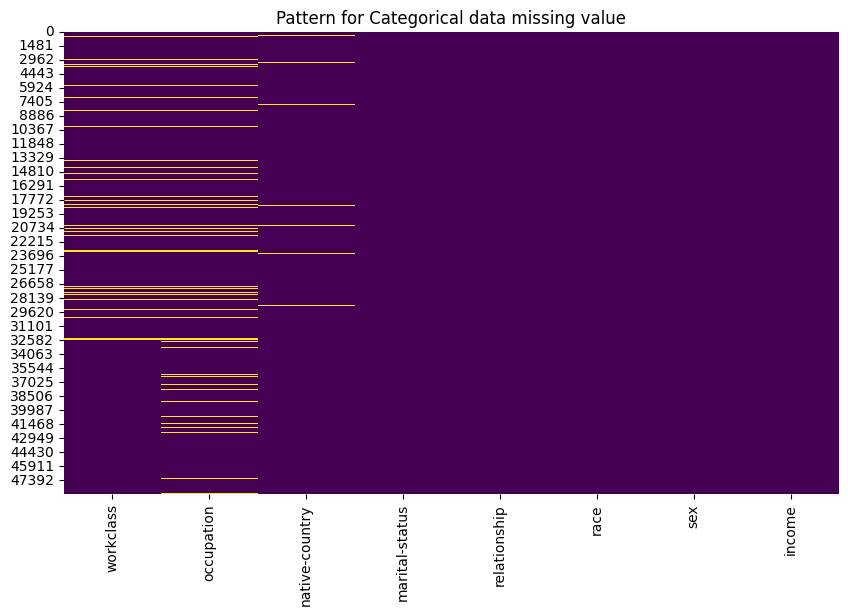

In [ ]:
#only workclass, occupation and native-country has missing value.

#before impute, best option is check first whether the missingness is random or systematic
#for MCAR (missing at random) - impute using mode
#for MNAR (missing depends on other feature)

#Since we already convert blank with NA during data processing,
#so, we need to plot missing for cell has unknown

unknown_mask = ucimlrepo_df[cat_cols] == 'Unknown'

plt.figure(figsize=(10, 6))
sns.heatmap(unknown_mask, cbar=False, cmap='viridis') # Yellow lines will show where data is missing
plt.title("Pattern for Categorical data missing value")
plt.show()



from the heatmap, the missing value for workclass and occupation occur systematic while native-country occur at random

so, native-country - impute using mode

workclass & occupation - impute with "unknown" to preserve facts that they are missing

In [ ]:
#define imputation type

#Ensure native-country is category before using.cat
ucimlrepo_df['native-country'] = ucimlrepo_df['native-country'].astype('category')

# 1. Get mode
mode_country = ucimlrepo_df['native-country'].mode()[0]

# 2. Change 'Unknown' category to Mode
ucimlrepo_df['native-country'] = ucimlrepo_df['native-country'].replace('Unknown', mode_country)
ucimlrepo_df['native-country'] = ucimlrepo_df['native-country'].cat.remove_unused_categories()

# 3. Remove 'Unknown' from category
cols_to_fix = ['workclass', 'occupation']
    #Ensure consistent word Unknown, unknown
for col in cols_to_fix:
  ucimlrepo_df[col] = ucimlrepo_df[col].astype(str) #change all format to string
  ucimlrepo_df[col] = ucimlrepo_df[col].replace('unknown', 'Unknown')
  ucimlrepo_df[col] = ucimlrepo_df[col].astype('category')


#check
print(ucimlrepo_df['native-country'].unique())
print(ucimlrepo_df['workclass'].unique())
print(ucimlrepo_df['occupation'].unique())

['US', 'Americas', 'Asia', 'Other', 'Europe']
Categories (5, object): ['Americas', 'Asia', 'Europe', 'Other', 'US']
['Government', 'Self-Employed', 'Private', 'Unknown', 'Unemployed', 'Other']
Categories (6, object): ['Government', 'Other', 'Private', 'Self-Employed', 'Unemployed', 'Unknown']
['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Prof-specialty', 'Other-service', ..., 'Tech-support', 'Unknown', 'Protective-serv', 'Armed-Forces', 'Priv-house-serv']
Length: 15
Categories (15, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ...,
                          'Sales', 'Tech-support', 'Transport-moving', 'Unknown']


/tmp/ipython-input-2345125163.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ucimlrepo_df['native-country'] = ucimlrepo_df['native-country'].replace('Unknown', mode_country)


In [ ]:
#check result
print("--- Standard NaN Count ---")
print(ucimlrepo_df[['native-country', 'workclass', 'occupation']].isna().sum())

--- Standard NaN Count ---
native-country    0
workclass         0
occupation        0
dtype: int64


**Step 4**


---
EDA



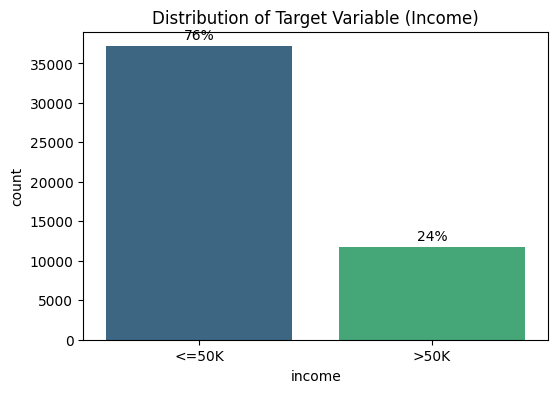

income
<=50K    76.1%
>50K     23.9%
Name: proportion, dtype: object


In [ ]:
#next, visualize the data


# 1. Check Target Balance (Class Imbalance) To see if we have equal number of income >50K and <=50K
plt.figure(figsize=(6, 4))

ax = sns.countplot(data=ucimlrepo_df, x='income', hue='income', palette='viridis', legend=False)
plt.title('Distribution of Target Variable (Income)')

total = len(ucimlrepo_df) #calculate n

#add % label
for p in ax.patches:
    height = p.get_height()
    # Avoid error
    if height > 0:
        percentage = f'{100 * height / total:.0f}%'
        # Arrange text at the centre (x + width/2) and a slightly above bar (height)
        ax.text(p.get_x() + p.get_width() / 2, height + 500, percentage,
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Optional is to show the distribution
print(ucimlrepo_df['income'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

confirm there's class imbalance because 76% of the data are from customer with income <=RM 50K.

So, the ratio is roughly 3:1. For every 3 people earning low income, only 1 earns high income

So, if getting 80% accuracy isn't impressive. Thus, aim for significantly higher than 76%, or look at other metrics.

as class is highly imbalance, we cannot rely on the accuarcy model to justify the model is good enough or not.

So, use matrices that can handle class imbalance better, for example:


1.   F1-Score: The harmonic mean of precision and recall.
2.   ROC-AUC: To measure how well the model separates the two classes.
3.   Precision/Recall: specifically for the >50K class (since finding      high-income earners is likely the goal).



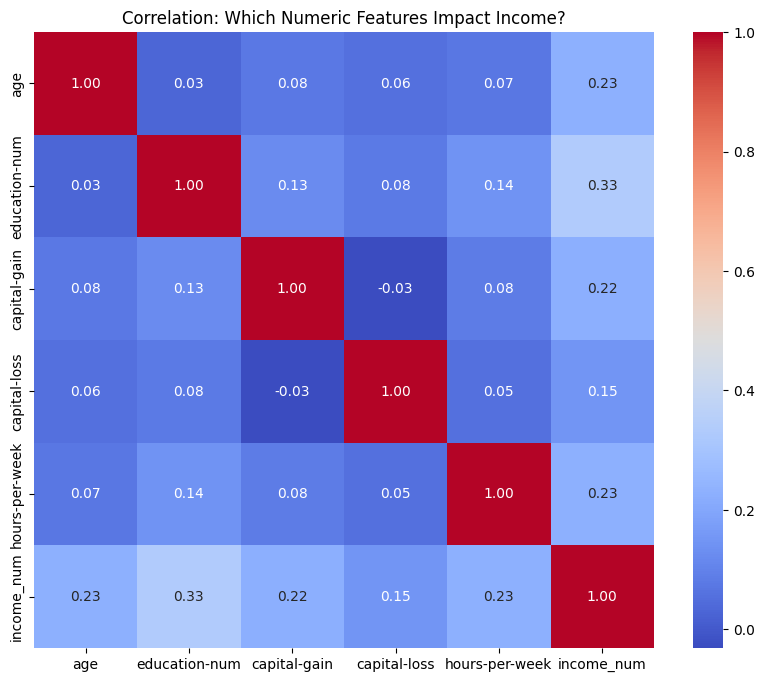

In [ ]:
# So, check which variables are highly affecting the income
# Check correlation among the numeric variables
corr_df = ucimlrepo_df.copy()

# 1. Encode Income to numbers (<=50K = 0, >50K = 1)
corr_df['income_num'] = corr_df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# 2. Select only numeric columns + the new income_num
# We exclude 'census_weight' because we know it's irrelevant
cols_to_corr = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_num']

# 3. Compute Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df[cols_to_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Which Numeric Features Impact Income?")
plt.show()

- age - 0.23 positive relationship
- education_num - 0.33 positive relationship - strongest predictor
- capital gain - 0.22 positive relationship
- capital loss - 0.15 postive relationship
- hour per week - 0.23 positive relationship

but actually relationship for all this num variables is low, so we visualize them in a plot to show the distribution.



count   48842.00
mean       38.64
std        13.71
min        17.00
25%        28.00
50%        37.00
75%        48.00
max        90.00
Name: age, dtype: float64


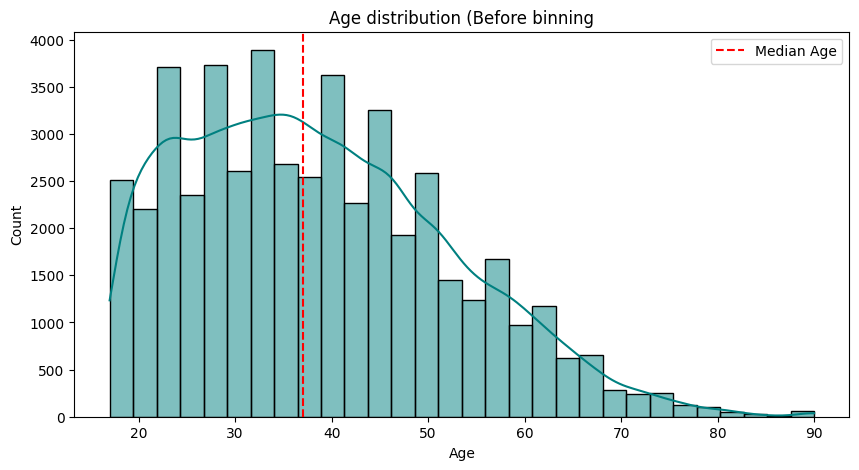

In [ ]:
# 4. so, check does older people earn more? does people working more hours earn more?

# a) show summary stats for age before binning
print(ucimlrepo_df['age'].describe())

# b). Plot Histogram for checking the distribution
plt.figure(figsize=(10, 5))
sns.histplot(ucimlrepo_df['age'], bins=30, kde=True, color='teal')
plt.title('Age distribution (Before binning')
plt.xlabel('Age')
plt.axvline(ucimlrepo_df['age'].median(), color='red', linestyle='--', label='Median Age')
plt.legend()
plt.show()

age group:
- 17-24: youngster/student doing part time/ just start work
- 25-44: prime working
- 45-64: peak time (pangkat tinggi, gaji stabil
- 65+  : retirement

since, distribution at each group age is dispropotionate
so, use domain knowlede to do age binning

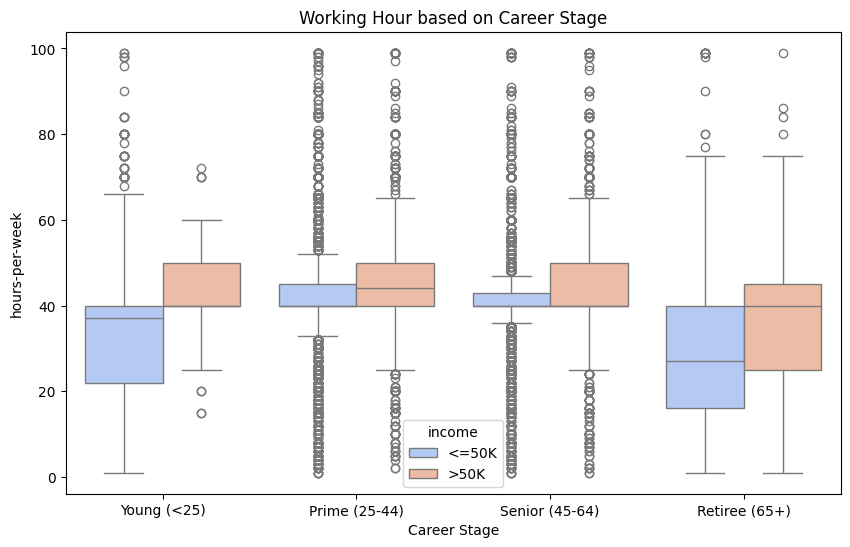

In [ ]:
#c) create boxplot to see age distribution effect towards income
df_viz = ucimlrepo_df.copy()

# Define bins follow 'Career Stage'
bins_career = [0, 24, 44, 64, 100]
labels_career = ['Young (<25)', 'Prime (25-44)', 'Senior (45-64)', 'Retiree (65+)']

df_viz['age_group'] = pd.cut(df_viz['age'], bins=bins_career, labels=labels_career)

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_viz, x='age_group', y='hours-per-week', hue='income', palette='coolwarm')
plt.title('Working Hour based on Career Stage')
plt.xlabel('Career Stage')
plt.show()




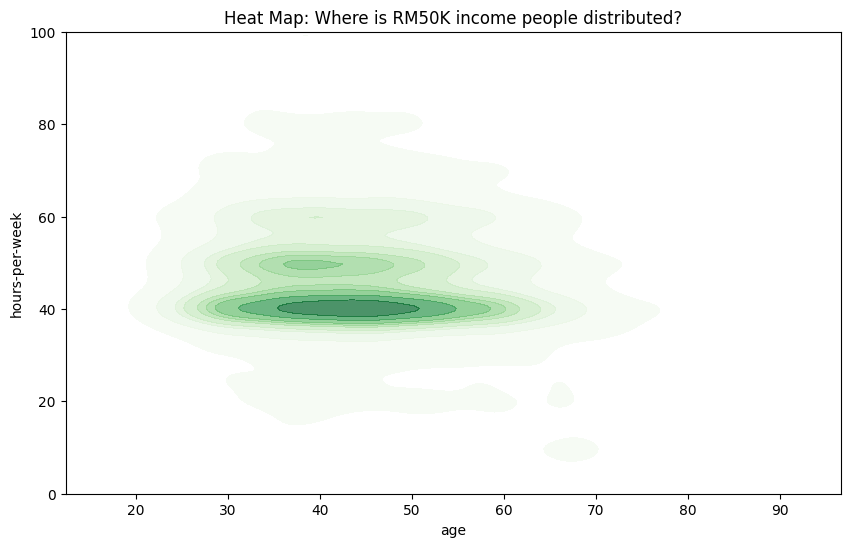

In [ ]:
#Do KDE because I want to further understand how long does individual with RM50K income work.

plt.figure(figsize=(10, 6))
# check for >50K sahaja
sns.kdeplot(data=ucimlrepo_df[ucimlrepo_df['income'] == '>50K'],
            x='age', y='hours-per-week',
            fill=True, cmap='Greens', alpha=0.7)
plt.title('Heat Map: Where is RM50K income people distributed?')
plt.ylim(0, 100) # select working hour 0 to 100hour
plt.show()

- Young age:  
    Even when young people work long hours, very few of them would get income >50k
- prime and senior:  
    Normally working around 40hours a week but mostly get income around <50k.    
    So, to get >50k they need to work OT or have more high position.

- senior:      
    Working hour has reduce yet, a distinct group still maintain income >50k is noticed.   
    This indicate a shift from labor-based income to asset/ownership-based income.

- In conclusion, Young workers cannot 'outwork' their lack of experience, while Prime-age workers must combine experience with high effort to maximize earnings. Senior workers, however, decouple time from money, leveraging accumulated career capital to maintain high income on reduced hours.





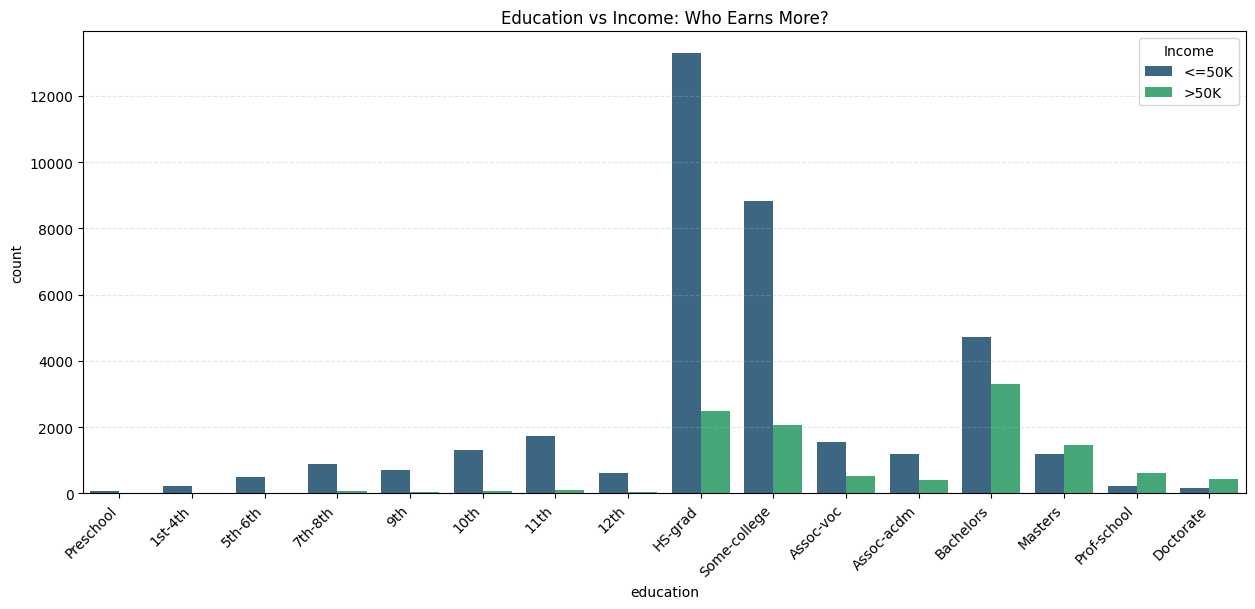

In [ ]:
# 5. Which education level earns more?

# Arrange edu level low to high
edu_order = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate']

plt.figure(figsize=(15, 6))

# create side to side plot
sns.countplot(data=ucimlrepo_df, x='education', hue='income', order=edu_order, palette='viridis')

plt.title('Education vs Income: Who Earns More?')
plt.xticks(rotation=45, ha='right') # label
plt.legend(title='Income', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3) # add grids
plt.show()

Most customer have education level HS-grad or some college.
However, if study at Assosc-acdm or lesser, it is really difficult to get >50k

Nevertheless, if education level at at least bachelors, the income ratio become 2:5.

It indicates that for each 3 bachelors holder customer, 2 would have income >50k

While, more than 50% of master, Prof-School and Doctorate has income >50k.

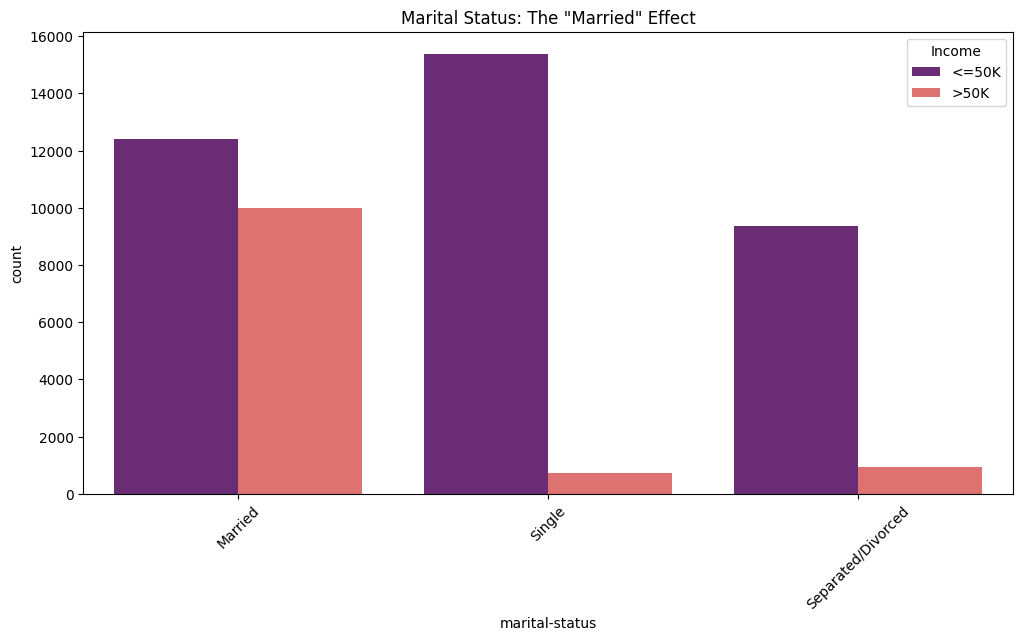

In [ ]:
# 6. Which marital status earns more?

plt.figure(figsize=(12, 6))

sns.countplot(data=ucimlrepo_df, x='marital-status', hue='income',
              order=ucimlrepo_df['marital-status'].value_counts().index,
              palette='magma')

plt.title('Marital Status: The "Married" Effect')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.show()

Normally, Married couple have highest propotion of high earners compared to the Single or Divorced individuals.

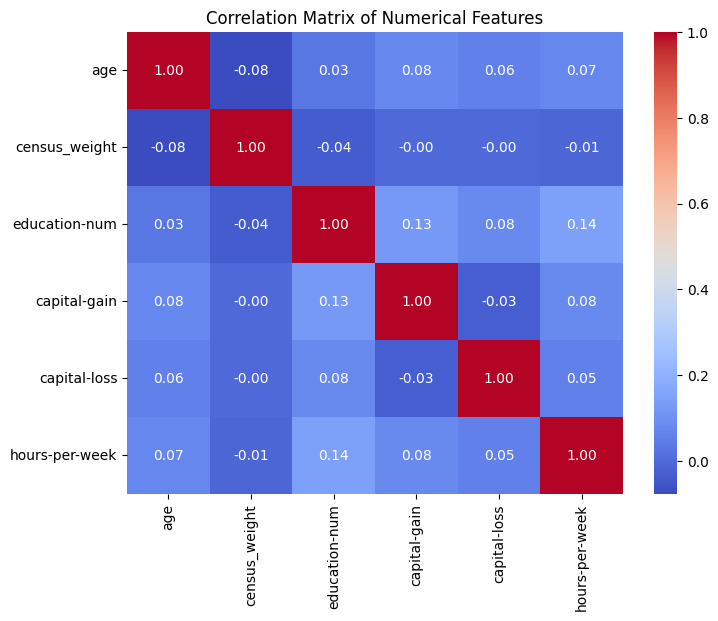

In [ ]:
# 4. Correlation Matrix (Numerical only)
# Check for multicollinearity
plt.figure(figsize=(8, 6))
# Select only numeric columns for correlation
numeric_df = ucimlrepo_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

There is no multicollinearity in the numeric dataset. Thus, each features provide unique information about the dataset.


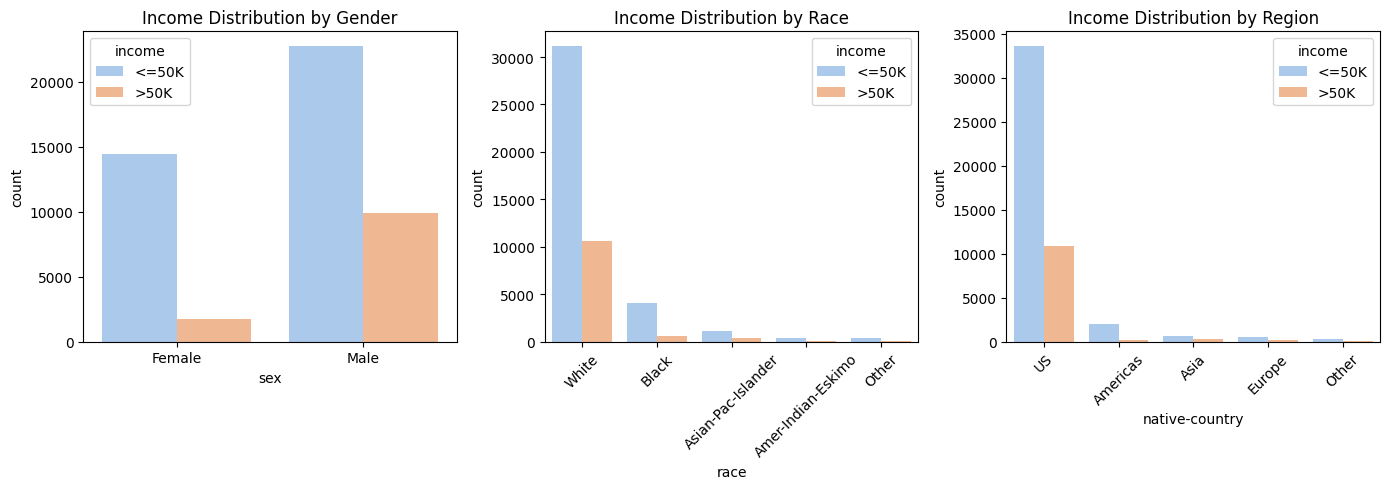

In [ ]:
#Check demographic for each income group

fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Plot 1: Gender vs Income
sns.countplot(data=ucimlrepo_df, x='sex', hue='income', ax=axes[0], palette='pastel')
axes[0].set_title('Income Distribution by Gender')

# Plot 2: Race vs Income
sns.countplot(data=ucimlrepo_df, x='race', hue='income', ax=axes[1], palette='pastel',
              order=ucimlrepo_df['race'].value_counts().index)
axes[1].set_title('Income Distribution by Race')
axes[1].tick_params(axis='x', rotation=45)

#Plot 3: native-country vs Income
sns.countplot(data=ucimlrepo_df, x='native-country', hue='income', ax=axes[2], palette='pastel',
              order=ucimlrepo_df['native-country'].value_counts().index)
axes[2].set_title('Income Distribution by Region')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- The data set is dominated by Male, White race and US citizen.
- Male has higher proportion of individuals with income >50K compared to Female.
- The white race and US citizen has the highest absolute number of high earners.


1.   Before doing modelling, we need to verify about significance of each numeric variables we have.
2.   Capital-gain and capital-loss we knew are skewed, so we plot to view the distribution of the individual with capital-gain and loss 0.
3.   Remember that this capital gain and loss earlier require log transformation
4.   Also remember about the class imbalance in the income dataset.
5.   After that, we do pair plot to see distribution of other numeric variables for example age, education-num, hours-per-week and income




Percentage of people with 0 Capital Gain: 91.74%
Percentage of people with 0 Capital Loss: 95.33%


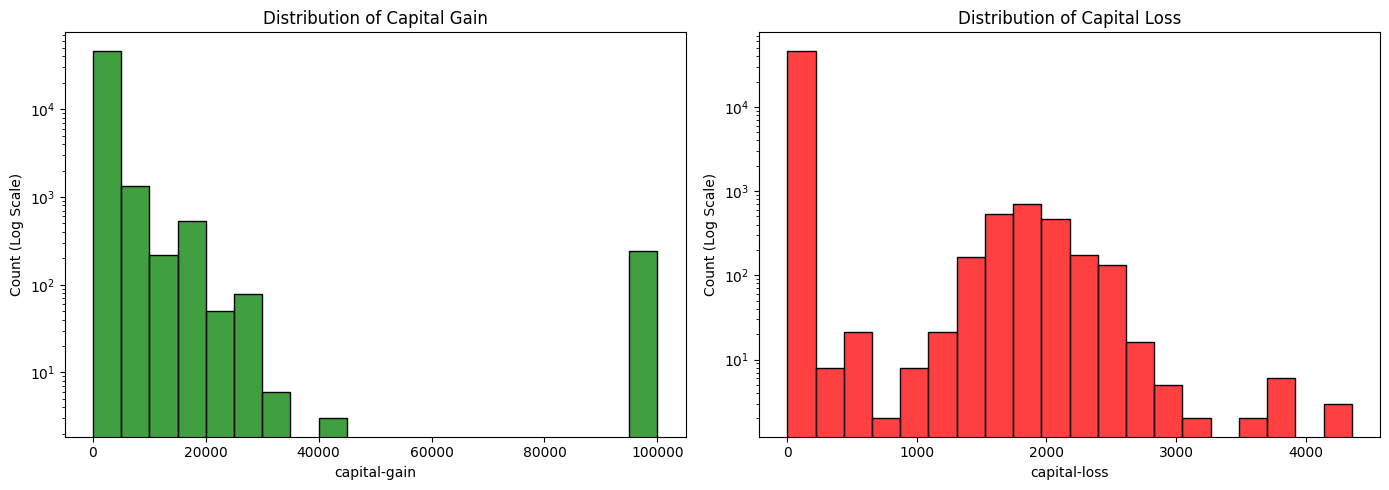

In [ ]:

# 1. Calculate how many people have 0 Capital Gain/Loss
zero_gain = (ucimlrepo_df['capital-gain'] == 0).mean() * 100
zero_loss = (ucimlrepo_df['capital-loss'] == 0).mean() * 100

print(f"Percentage of people with 0 Capital Gain: {zero_gain:.2f}%")
print(f"Percentage of people with 0 Capital Loss: {zero_loss:.2f}%")

# 2. Plot the Distribution #use log scale because earlier check shows this variables need transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Capital Gain
sns.histplot(ucimlrepo_df['capital-gain'], bins=20, kde=False, color='green', ax=axes[0])
axes[0].set_title('Distribution of Capital Gain')
axes[0].set_yscale('log')
axes[0].set_ylabel('Count (Log Scale)')

# Capital Loss
sns.histplot(ucimlrepo_df['capital-loss'], bins=20, kde=False, color='red', ax=axes[1])
axes[1].set_title('Distribution of Capital Loss')
axes[1].set_yscale('log')
axes[1].set_ylabel('Count (Log Scale)')

plt.tight_layout()
plt.show()

Based on the Log-Scale Histograms, over 90% of the population recorded zero values for these variables.

Because of the lack variance in the data, we are not plotting this under the pairplot to avoid overplotting.

Regardless, they remain important in predictive modelling.

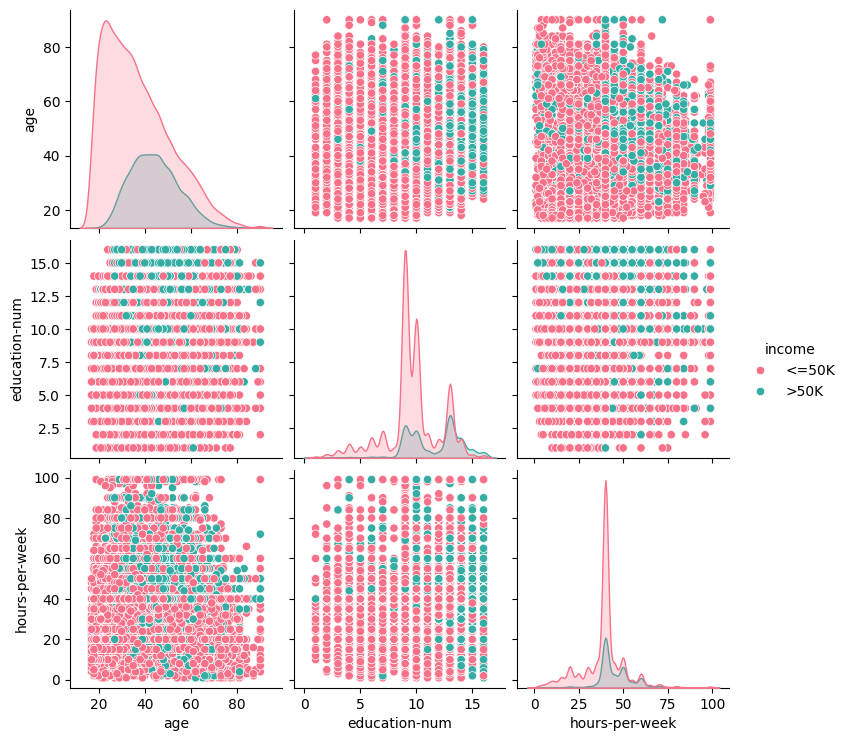

In [ ]:
# Choose numeric columns
cols_to_plot = ['age', 'education-num', 'hours-per-week', 'income']
sns.pairplot(ucimlrepo_df[cols_to_plot], hue='income', palette='husl')
plt.show()

From the pair plot:


1.   Older people (Experience) tends to be high earners compared to Younger people.
2.   Higher education people tends to be high earners.
3.   High earners are more likely to work over 40 hours a week.



**Step 5**


---
Create Model



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Copy data
df_model = ucimlrepo_df.copy()

# Transform data
df_model['capital-gain'] = np.log1p(df_model['capital-gain'])
df_model['capital-loss'] = np.log1p(df_model['capital-loss'])

# Encode Target Variable : Income from >50K and <=50k to 1 and 0
df_model['income'] = df_model['income'].map({'<=50K': 0, '>50K': 1})

# Define features X and Y
X = df_model.drop(['income', 'census_weight', 'education'], axis=1) #Drop redundant column to avoid leakage
y = df_model['income']

# Convert all categorical text columns in X into numbers
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data to make features look similar (centred around 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Success! Data split correctly.")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

✅ Success! Data split correctly.
Training Data Shape: (39073, 40)
Testing Data Shape: (9769, 40)


In [ ]:
# Next, modelling using Logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train) # Use scaled X



LogisticRegression(max_iter=1000, random_state=42)


--- Logistic Regression Results (Scaled) ---
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7431
           1       0.71      0.58      0.64      2338

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.77      9769
weighted avg       0.84      0.84      0.84      9769

ROC-AUC Score: 0.8962


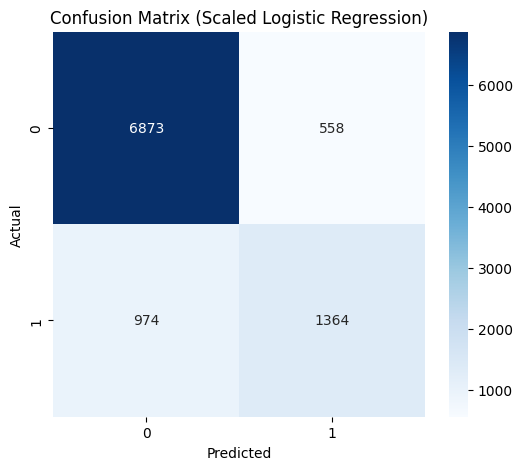

In [ ]:
# Next Evaluate the model
y_pred = log_reg.predict(X_test_scaled) # Use scaled X
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("\n--- Logistic Regression Results (Scaled) ---")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# Visual Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Scaled Logistic Regression)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Conservative Logistic Regression:

Recall class 1 is 58%:

it indicates that the model can find 58% of high earners in the dataset. Precision class 1 is 71%

it indicates that it is correct for 71% of the time.

So, model can identify lesser high earners but the precision is quite high.

Additionally, overall model accuracy is 84% which is considered high.




In [ ]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE #use SMOTE because class imbalance

# Copy information from the ori data
df_model = ucimlrepo_df.copy()

# Transform the data
df_model['capital-gain'] = np.log1p(df_model['capital-gain'])
df_model['capital-loss'] = np.log1p(df_model['capital-loss'])

# Remove unnessary variables
df_model = df_model.drop(['census_weight', 'education'], axis=1)

# Encode Target Variable : Income from >50K and <=50k to 1 and 0
df_model['income'] = df_model['income'].map({'<=50K': 0, '>50K': 1})

# D. One-Hot Encode Categorical Columns
df_model = pd.get_dummies(df_model, drop_first=True)




In [ ]:
# Next, we split the original data to apply the SMOTE technique for our Imbalance Data
X = df_model.drop('income', axis=1)
y = df_model['income']

# Stratify ensure we keep the ratio of 0s and 1s in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nOriginal Training Counts:")
print(y_train.value_counts())

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE Training Count:")
print(y_train_smote.value_counts())
#  outcome should be 1 and 0 has same number



Original Training Counts:
income
0    29724
1     9349
Name: count, dtype: int64

After SMOTE Training Count:
income
0    29724
1    29724
Name: count, dtype: int64


In [ ]:
# Predict on the the Test Data
y_pred_smote = log_reg_smote.predict(X_test)

# Evaluate
print("\n--- Classification Report (With SMOTE) ---")
print(classification_report(y_test, y_pred_smote))


--- Classification Report (With SMOTE) ---
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7431
           1       0.58      0.75      0.65      2338

    accuracy                           0.81      9769
   macro avg       0.75      0.79      0.76      9769
weighted avg       0.83      0.81      0.82      9769



Smote modelling

Recall class 1 is 75%:
- it indicates that the model can find 75% of high earners in the dataset.
Precision class 1 is 58%
- it indicates that it only correct for 58% of the time.

- So, model can identify more high earners but the precision is very low.
- Nevertheless, overall model accuracy is 81% which is considered high.

- When choosing between the Baseline Logistic Regression (Conservative alternative) and the SMOTE-Enhanced Model, the decision depends entirely on the business objective and the cost of errors.

- The conservative model prioritize on the model accuracy while, SMOTE prioritize on on recall.

- This is because by balancing the class, the training data is becoming more sensitive to the minority class.

- Conservative method is best for highly risk decision where false positive is costly. Example of application are bank loan approvals.

- Opportunity-Driven Marketing for example credit card application.



So, we try use Random Forest because it is better at handling class imbalance and a more complex rule for example, young people usually earn less than <50K unless their education level is master

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#make prediction
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
#evaluate model
print("\n--- Random Forest Results (Balanced) ---")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")


--- Random Forest Results (Balanced) ---
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7431
           1       0.68      0.65      0.67      2338

    accuracy                           0.84      9769
   macro avg       0.79      0.78      0.78      9769
weighted avg       0.84      0.84      0.84      9769

ROC-AUC Score: 0.8907


Random Forest

Recall class 1 is 65%:
- it indicates that the model can find 65% of high earners in the dataset.
Precision class 1 is 68%
- it indicates that it only correct for 68% of the time.

- So, model can identify more high earners although the precision is quite low.
- Nevertheless, overall model accuracy is 84% which is considered high.

/tmp/ipython-input-856422400.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


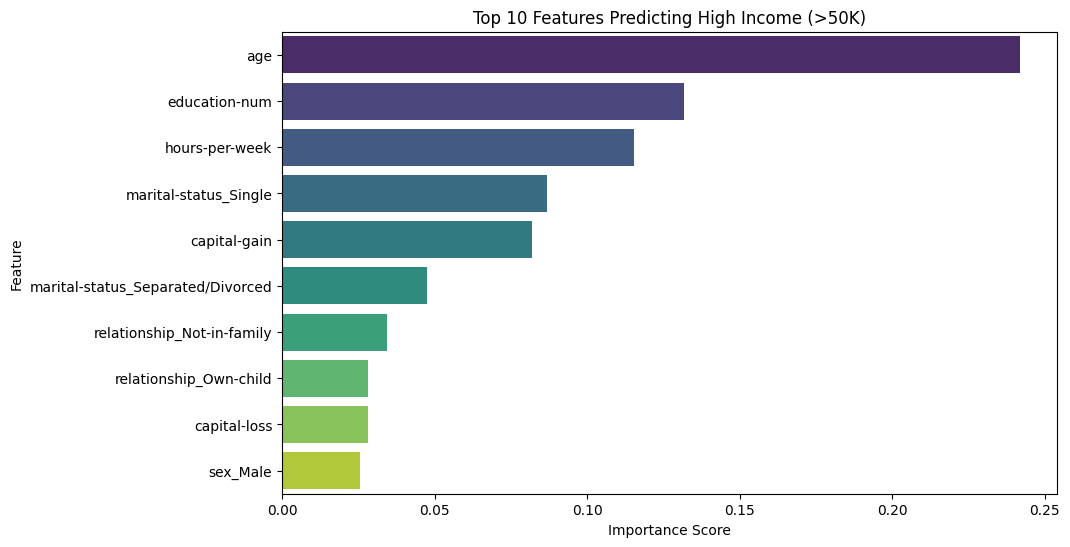

In [ ]:
#Feature Importance to check which features matter the most
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

#Plot Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Features Predicting High Income (>50K)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**Insights 1:**
- The older the individual the higher the income probably because the career growth as experience growth
- Education level is important to determine the income level, the higher the education most probably higher income
- Working hours also affected the income level, the longer we work most probably would have higher income
- Regarding the marital status, single or divorced can be use to filter out if the individual high earner or not
- Capital gain is a niche indicator of wealth because, it only affect fewer people unlike age and education


**Step 6**


---
Conclusion


This project successfully developed a predictive machine learning pipeline to identify high-income individuals (earning >$50K) based on demographic census data. By performing the Exploratory Data Analysis (EDA), data cleaning, and model evaluation, we arrived at the following conclusions:

1.    Initial analysis revealed a significant class imbalance, with only ~24% of the data is imbalance because only 24% of the population earning above $50K.

2.   Logistic Regression could achieve 84% accuracy because it predict majority class of income <= $50k.

3.   By prioritizing the recall and precision, the model is able to identify the minority class for individuals with income > $50K.

Below are the model performance for each Logistic Regression, SMOTE-Enhance Model and Random Forest that were employed during the study.

1.   **Logistic Regression**: Is a conservative model. It produce 73% precision but fail to identify 40% of the high earners group due to its low recall.

2.   **SMOTE-Enhanced Model**: It produced 75% recall for the high earners but introduced noise because the precison drop to 58%. Thus the model could produce higher false-positive rate.

3.   **Random Forest**: Is the best solution we have so far as the model accuracy is 84% which is similar to a conservative Logistic Regression and the recall and precision is at 65% and 68% respectively which is quite satisfactory.

Additionally, from the feature importance analysis above, Age is the single most significant predictor of high income, followed by Education and Marital Status.

This finding is supported by both empirical government data and economic theory. According to the U.S. Bureau of Labor Statistics (BLS) (https://www.bls.gov/charts/usual-weekly-earnings/usual-weekly-earnings-current-quarter-by-age.htm), median weekly earnings consistently rise with age, peaking for workers aged 35 to 54.

This correlation exists because age serves as a proxy for work experience and skill accumulation. As noted in human capital theory—specifically the Mincer Earnings Function (Mincer, 1974, p. 65), earnings typically follow a concave upward trajectory as individuals gain tenure and expertise over their careers before leveling off near retirement.

Consequently, the model correctly learned that "older" individuals are statistically more likely to be high earners due to the cumulative value of their experience in the workforce.

Therefore, the study could benefit:

1.    **Financial Institution**: The model provides a data-driven method for an initial credit screening. By prioritizing applicants with high education ad stable marital status, lenders can streamline approval process for premium financial products while minimizing risk.

2.    **Marketing Strategy**: Marketing team can utilize the forest model to target the specific 30% of the poputlation

Instead of broad, indiscriminate advertising, marketing teams can utilize the Random Forest model to target the minority class of the high earners. The model produce precision of 68%. Thus, it is helpful to optimize the return on ad spend (ROAS).

Finally, we recomment to deploy a Random Forest Classifier for production use. It provides the most statistically sound and can be used commercially.In the next study, we recommend to include a new variables called debt-to-income ratio to further improve precision and reduce false positives error.




